## Notebook Content

In this notebook, after we optimize our training model, we will test the model.

## Import Libraries

In [1]:
import sqlite3 as sql
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score ,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


### Read Data from SQL

In [2]:
Xs_val_train_connection = sql.connect('Xs_train_val_FE.db')
Xs_val_train = pd.read_sql('SELECT * FROM Xs_train_val_FE', Xs_val_train_connection)

In [3]:
Xs_test_connection= sql.connect('Xs_test_FE.db')
Xs_test = pd.read_sql('SELECT * FROM Xs_test_FE', Xs_test_connection)

In [4]:
y_val_train_connection= sql.connect('y_train_val_FE.db')
y_val_train = pd.read_sql('SELECT * FROM y_train_val_FE', y_val_train_connection)

In [5]:
y_test_connection= sql.connect('y_test.db')
y_test = pd.read_sql('SELECT * FROM y_test', y_test_connection)

### Drop Index Column

In [6]:
Xs_val_train.drop('index', axis='columns', inplace = True)
Xs_test.drop('index', axis='columns', inplace = True)
y_val_train.drop('index', axis='columns', inplace = True)
y_test.drop('index', axis='columns', inplace = True)

### Methods to Used Among File

In [7]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

In [8]:
def get_new_r2(Xs_train_lc, y_train_lc, Xs_val_lc, y_val_lc):
    """
    This method will be called to fit the training set with score and predict the score for test set.
    After that, it will print all the scores with the difference between them.
    """
    model = GradientBoostingRegressor(random_state = 100)
    fitting = model.fit(Xs_train_lc,y_train_lc.values.ravel())
    t_score= fitting.score(Xs_train_lc,y_train_lc.values.ravel()) * 100
    print('Training score with Gradient Boosting Regressor {:.2f}%'.format(t_score))
    y_preds = fitting.predict(Xs_val_lc)
    v_score= r2_score(y_val_lc.values.ravel(), y_preds)* 100
    print('Testing score with Gradient Boosting Regressor {:.2f}%'.format(v_score))
    print('The difference between scores is {:.2f}%'.format(abs(t_score-v_score)))

In [9]:
get_new_r2(Xs_val_train, y_val_train, Xs_test, y_test)

Training score with Gradient Boosting Regressor 94.77%
Testing score with Gradient Boosting Regressor 89.16%
The difference between scores is 5.61%


As can be seen there is a difference between training and testing by 5.61%, which is good!

In [10]:
model = GradientBoostingRegressor(random_state = 100)
fitting = model.fit(Xs_val_train, y_val_train.values.ravel())
y_preds = fitting.predict(Xs_test)

In [11]:
print("Mean Absolute Error:",MAE(y_test.values.ravel(),y_preds))

Mean Absolute Error: 12.444488335043415


### Plots of Testing 

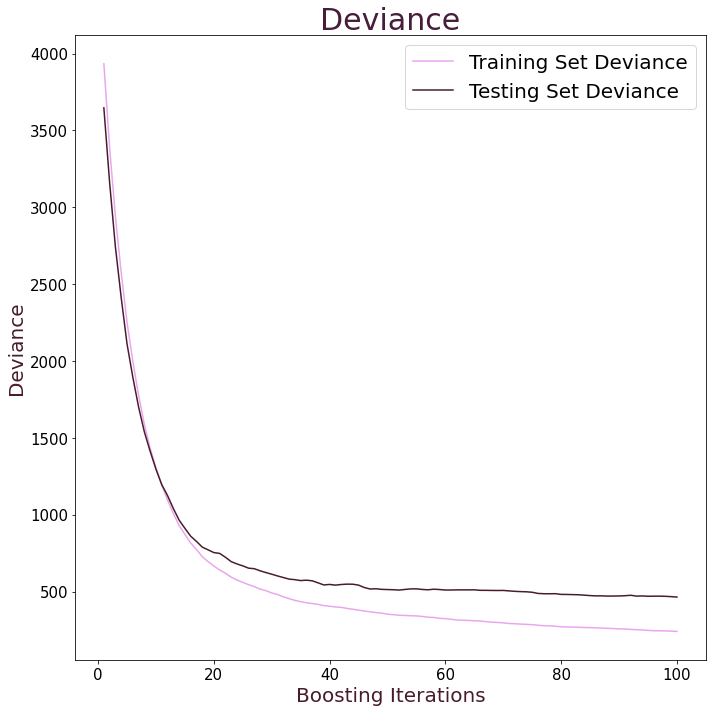

In [12]:
# plot thr Deviance 
params = {'n_estimators': 100,
          'max_depth': 8,
          'min_samples_split': 3,
          'learning_rate': 0.1,
          'loss': 'squared_error'} ## defaults

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(model.staged_predict(Xs_test)):
    test_score[i] = model.loss_(y_test.values.ravel(), y_pred)

fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.title('Deviance', fontsize = 30 ,  color= '#481D3B')
plt.plot(np.arange(params['n_estimators']) + 1, model.train_score_, 'y-',
         label='Training Set Deviance', color = "#EAA6EC")
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Testing Set Deviance', color='#481C2A')
plt.legend(loc='upper right', fontsize = 20)
plt.xlabel('Boosting Iterations', fontsize = 20, color='#481C2A')
plt.ylabel('Deviance', fontsize = 20, color= '#481C2A')
plt.xticks(fontsize= 15) 
plt.yticks(fontsize= 15) 
fig.tight_layout()
plt.savefig('Deviance.png')
plt.show()

As can be seen, the squared error is start decreasing in the same rate in both training and test sets from beginning until approximitaly iteration 15, then continue decreaing but with lower rate in testing set. 

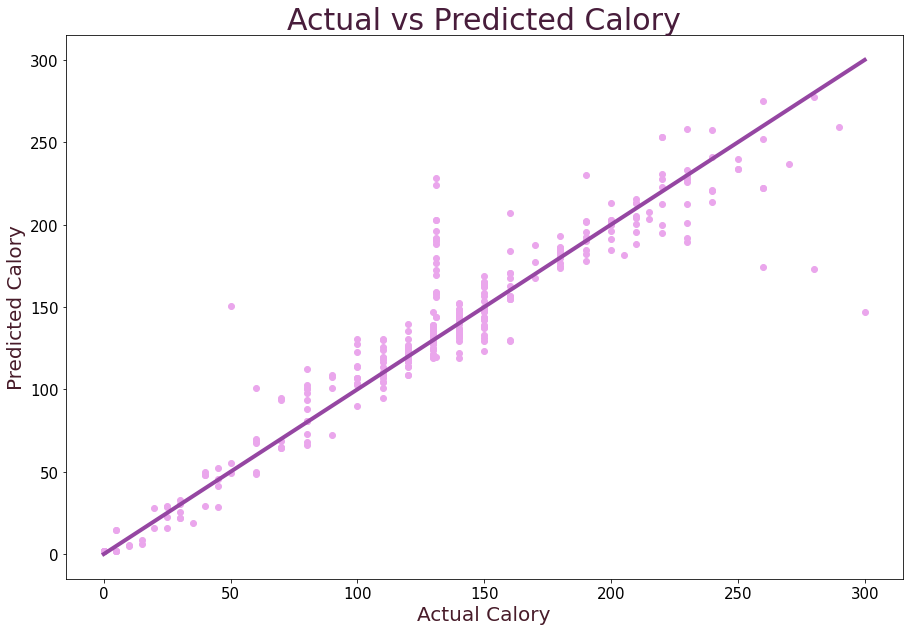

In [13]:
# plot actual vs predicted calory
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(y_test, y_preds, color= "#EAA6EC")
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '#9546A2', lw=4)
ax.set_title('Actual vs Predicted Calory', fontsize = 30,  color= '#481D3B')
ax.set_xlabel('Actual Calory', fontsize = 20,color='#481C2A')
plt.xticks(fontsize= 15) 
plt.yticks(fontsize= 15) 
ax.set_ylabel('Predicted Calory', fontsize = 20,color='#481C2A')
plt.savefig('Actuals_pred.png')
plt.show()

The above graph shows the actual calory vs. predicted calory  

MSE: 463.94


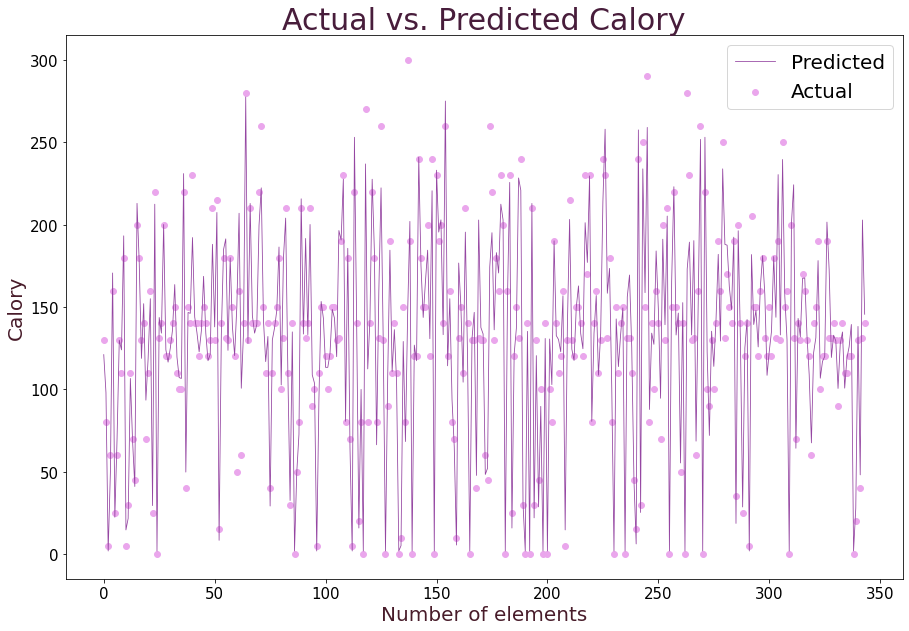

In [15]:
#plot the predected and actuals 
mse = mean_squared_error(y_test,y_preds)
print("MSE: %.2f" % mse)
plt.figure(figsize=[15,10])
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=35, color="#EAA6EC", label="Actual")
plt.plot(x_ax, y_preds, lw=0.8, color="#9546A2", label="Predicted")
plt.title("Actual vs. Predicted Calory", fontsize = 30,  color= '#481D3B')
plt.xlabel("Number of elements",  fontsize = 20,color='#481C2A')
plt.ylabel("Calory",  fontsize = 20,color='#481C2A')
plt.xticks(fontsize= 15) 
plt.yticks(fontsize= 15) 
plt.savefig('mean_squared.png')
plt.legend(prop={'size': 20})
plt.show()

The above graph shows the prediction calory against original calory.